In [5]:
import sys
import os
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
import itertools
import pdb
from scipy.optimize import curve_fit
from copy import copy, deepcopy

sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
from SPAM import *
import json


sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
from EAB_CB_data_analysis import *
import bootstrap

In [7]:
# circ_path="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt"
# c_d2=[]
# load_circuit_file(c_d2,circ_path)

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
# Lines= file.readlines()
# c_d2=[]
# count = 0
# for line in Lines:
#     c_d2.append(line)
#     count += 1
# print (count)
# count=0

# # file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# # Lines= file.readlines()
# # c_d4=[]
# # count = 0
# # for line in Lines:
# #     c_d4.append(line)
# #     count += 1
# # print (count)
# # count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
# Lines= file.readlines()
# c_d8=[]
# count = 0
# for line in Lines:
#     c_d8.append(line)
#     count += 1
# print (count)
# count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
# Lines= file.readlines()
# c_d16=[]
# count = 0
# for line in Lines:
#     c_d16.append(line)
#     count += 1
# print (count)
# count=0


# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
# Lines= file.readlines()
# c_d32=[]
# count = 0
# for line in Lines:
#     c_d32.append(line)
#     count += 1
# print (count)
# count=0



In [59]:
dataset1={}
dataset1["info"]="2024-03-27 Ramsey_DD_Y_150us_4gates"
dataset1["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_150us_4gates/"
dataset1["datafiles"],dataset1["datafileIdx"]=load_datafile_ordered(dataset1["path"])
# print (dataset1["datafiles"])

dataset2={}
dataset2["info"]="2024-03-27 Ramsey_DD_Y_150us_32gates"
dataset2["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_150us_32gates/"
dataset2["datafiles"],dataset2["datafileIdx"]=load_datafile_ordered(dataset2["path"])
# print (dataset2["datafiles"])

dataset3={}
dataset3["info"]="2024-03-27 Ramsey_DD_Y_150us_32gates"
dataset3["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_150us_64gates/"
dataset3["datafiles"],dataset3["datafileIdx"]=load_datafile_ordered(dataset3["path"])
# print (dataset2["datafiles"])

dataset4={}
dataset4["info"]="2024-03-27 Ramsey_DD_Y_150us_100gates"
dataset4["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_150us_100gates/"
dataset4["datafiles"],dataset4["datafileIdx"]=load_datafile_ordered(dataset4["path"])
# print (dataset2["datafiles"])




dataset5={}
dataset5["info"]="2024-03-27 Ramsey_DD_Y_150us_4gates"
dataset5["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_4gates/"
dataset5["datafiles"],dataset5["datafileIdx"]=load_datafile_ordered(dataset5["path"])
# print (dataset1["datafiles"])

dataset6={}
dataset6["info"]="2024-03-27 Ramsey_DD_Y_150us_32gates"
dataset6["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_16gates/"
dataset6["datafiles"],dataset6["datafileIdx"]=load_datafile_ordered(dataset6["path"])
# print (dataset2["datafiles"])

dataset7={}
dataset7["info"]="2024-03-27 Ramsey_DD_Y_150us_32gates"
dataset7["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_32gates/"
dataset7["datafiles"],dataset7["datafileIdx"]=load_datafile_ordered(dataset7["path"])
# print (dataset2["datafiles"])

dataset8={}
dataset8["info"]="2024-03-27 Ramsey_DD_Y_150us_32gates"
dataset8["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_64gates/"
dataset8["datafiles"],dataset8["datafileIdx"]=load_datafile_ordered(dataset8["path"])
# print (dataset2["datafiles"])

dataset9={}
dataset9["info"]="2024-03-27 Ramsey_DD_Y_150us_100gates"
dataset9["path"]="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_100gates/"
dataset9["datafiles"],dataset9["datafileIdx"]=load_datafile_ordered(dataset9["path"])
# print (dataset2["datafiles"])


# 150 us*2 wait between DD pulse

In [21]:
C=30
Set_Mapping([2,1])
nqubit=2
# results_d2=np.zeros((C,2**(nqubit)))
# results_d4=np.zeros((C,2**(nqubit)))
# results_d8=np.zeros((C,2**(nqubit)))

results_150us_4gates_traced=np.zeros((C,2**(1)))
results_150us_32gates_traced=np.zeros((C,2**(1)))
results_150us_64gates_traced=np.zeros((C,2**(1)))
results_150us_100gates_traced=np.zeros((C,2**(1)))

a=Quantum_State(nqubit)
a_s=Quantum_State(nqubit)
b_c=Quantum_Circuit(nqubit,"qc")

a_comp2=Quantum_State(nqubit)
a_comp=Quantum_State(nqubit)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


In [22]:
filenames_data=[]
# counts_d2=[]
# counts_d2_spam=[]
# counts_d2_sim=[]
# counts=[]
# counts_spam=[]
# counts_sim=[]
filenames_data=dataset1["datafiles"].copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=dataset1["path"]
# circuit=c_d2
# c=20
fileIdx=dataset1["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_150us_4gates_traced[i]= data_traced.population

    # b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    # print (circuit[Idx-1])
    # b=b_c.Simulate()
    # sim_traced=Trace_Out(b,[0,1,2,3])
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])
     


2024-03-27-171940_Line_001.txt
2024-03-27-171947_Line_002.txt
2024-03-27-171954_Line_003.txt
2024-03-27-172001_Line_004.txt
2024-03-27-172008_Line_005.txt
2024-03-27-172015_Line_006.txt
2024-03-27-172022_Line_007.txt
2024-03-27-172028_Line_008.txt
2024-03-27-172036_Line_009.txt
2024-03-27-172043_Line_010.txt
2024-03-27-172050_Line_011.txt
2024-03-27-172057_Line_012.txt
2024-03-27-172104_Line_013.txt
2024-03-27-172111_Line_014.txt
2024-03-27-172117_Line_015.txt
2024-03-27-172124_Line_016.txt
2024-03-27-172132_Line_017.txt
2024-03-27-172139_Line_018.txt
2024-03-27-172146_Line_019.txt
2024-03-27-172152_Line_020.txt
2024-03-27-172200_Line_021.txt
2024-03-27-172207_Line_022.txt
2024-03-27-172213_Line_023.txt
2024-03-27-172221_Line_024.txt
2024-03-27-172228_Line_025.txt
2024-03-27-172235_Line_026.txt
2024-03-27-172242_Line_027.txt
2024-03-27-172248_Line_028.txt
2024-03-27-172256_Line_029.txt
2024-03-27-172303_Line_030.txt


In [24]:
filenames_data=[]

filenames_data=dataset2["datafiles"].copy()

paf_data=dataset2["path"]

fileIdx=dataset2["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_150us_32gates_traced[i]= data_traced.population

    # b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    # print (circuit[Idx-1])
    # b=b_c.Simulate()
    # sim_traced=Trace_Out(b,[0,1,2,3])
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])
     


2024-03-27-172519_Line_001.txt
2024-03-27-172528_Line_002.txt
2024-03-27-172538_Line_003.txt
2024-03-27-172549_Line_004.txt
2024-03-27-172559_Line_005.txt
2024-03-27-172608_Line_006.txt
2024-03-27-172618_Line_007.txt
2024-03-27-172628_Line_008.txt
2024-03-27-172639_Line_009.txt
2024-03-27-172649_Line_010.txt
2024-03-27-172659_Line_011.txt
2024-03-27-172708_Line_012.txt
2024-03-27-172718_Line_013.txt
2024-03-27-172729_Line_014.txt
2024-03-27-172738_Line_015.txt
2024-03-27-172748_Line_016.txt
2024-03-27-172759_Line_017.txt
2024-03-27-172809_Line_018.txt
2024-03-27-172819_Line_019.txt
2024-03-27-172828_Line_020.txt
2024-03-27-172839_Line_021.txt
2024-03-27-172848_Line_022.txt
2024-03-27-172858_Line_023.txt
2024-03-27-172909_Line_024.txt
2024-03-27-172919_Line_025.txt
2024-03-27-172929_Line_026.txt
2024-03-27-172938_Line_027.txt
2024-03-27-172948_Line_028.txt
2024-03-27-172959_Line_029.txt
2024-03-27-173009_Line_030.txt


In [26]:
filenames_data=[]

filenames_data=dataset3["datafiles"].copy()

paf_data=dataset3["path"]

fileIdx=dataset3["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_150us_64gates_traced[i]= data_traced.population

2024-03-27-173135_Line_001.txt
2024-03-27-173149_Line_002.txt
2024-03-27-173203_Line_003.txt
2024-03-27-173217_Line_004.txt
2024-03-27-173231_Line_005.txt
2024-03-27-173245_Line_006.txt
2024-03-27-173259_Line_007.txt
2024-03-27-173313_Line_008.txt
2024-03-27-173327_Line_009.txt
2024-03-27-173341_Line_010.txt
2024-03-27-173355_Line_011.txt
2024-03-27-173409_Line_012.txt
2024-03-27-173423_Line_013.txt
2024-03-27-173437_Line_014.txt
2024-03-27-173451_Line_015.txt
2024-03-27-173505_Line_016.txt
2024-03-27-173519_Line_017.txt
2024-03-27-173533_Line_018.txt
2024-03-27-173547_Line_019.txt
2024-03-27-173601_Line_020.txt
2024-03-27-173615_Line_021.txt
2024-03-27-173629_Line_022.txt
2024-03-27-173643_Line_023.txt
2024-03-27-173657_Line_024.txt
2024-03-27-173711_Line_025.txt
2024-03-27-173725_Line_026.txt
2024-03-27-173739_Line_027.txt
2024-03-27-173753_Line_028.txt
2024-03-27-173807_Line_029.txt
2024-03-27-173821_Line_030.txt


In [28]:
filenames_data=[]

filenames_data=dataset4["datafiles"].copy()

paf_data=dataset4["path"]

fileIdx=dataset4["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_150us_100gates_traced[i]= data_traced.population

2024-03-27-183140_Line_001.txt
2024-03-27-183159_Line_002.txt
2024-03-27-183218_Line_003.txt
2024-03-27-183236_Line_004.txt
2024-03-27-183255_Line_005.txt
2024-03-27-183314_Line_006.txt
2024-03-27-183333_Line_007.txt
2024-03-27-183351_Line_008.txt
2024-03-27-183410_Line_009.txt
2024-03-27-183429_Line_010.txt
2024-03-27-183448_Line_011.txt
2024-03-27-183507_Line_012.txt
2024-03-27-183526_Line_013.txt
2024-03-27-183545_Line_014.txt
2024-03-27-183604_Line_015.txt
2024-03-27-183622_Line_016.txt
2024-03-27-183641_Line_017.txt
2024-03-27-183700_Line_018.txt
2024-03-27-183719_Line_019.txt
2024-03-27-183738_Line_020.txt
2024-03-27-183756_Line_021.txt
2024-03-27-183815_Line_022.txt
2024-03-27-183834_Line_023.txt
2024-03-27-183853_Line_024.txt
2024-03-27-183912_Line_025.txt
2024-03-27-183931_Line_026.txt
2024-03-27-183950_Line_027.txt
2024-03-27-184008_Line_028.txt
2024-03-27-184027_Line_029.txt
2024-03-27-184046_Line_030.txt


[ 0.49453355 10.00567409 -0.50146358  0.50010457]
[ 0.49278062 10.02543863 -0.49039831  0.50424375]


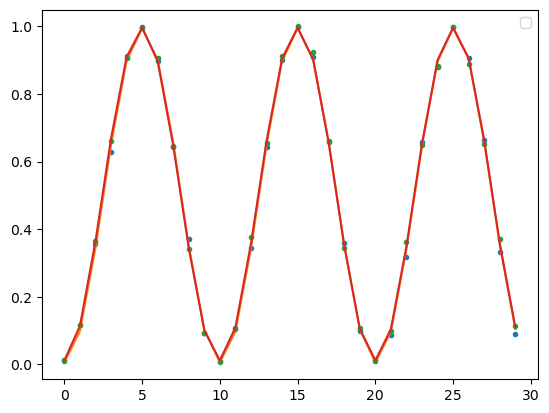

In [57]:
pi=math.pi
def test_func(x, a, b, c,d):
    return a * np.sin(2*pi/b * x + pi*c)+d
x_c=np.linspace(0,6*math.pi,num=30)

# for i in range (6):
#     print (pairname_list[i])
#     plt.figure()
#     plt.title(pairname_list[i])
#     plt.plot(LineIdxList,results[i],".")
#     params, params_covariance = optimize.curve_fit(test_func, LineIdxList, results[i],
#                                                p0=[1, 2*pi/180,0])
#     plt.plot(x_c,test_func(x_c,params[0],params[1],params[2]))
#     print (params[0])
# #     print (params_covariance)
#     if i==0:
#         print ("fidelity:",abs(params[0])/2+(1-0.00531226346565814)/2)
#     if i==1:
#         print ("fidelity:",abs(params[0])/2+(1-0.003236918472973552)/2)
#     plt.show()
    
plt.plot(results_150us_4gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_150us_4gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
# plt.plot(results_150us_32gates_traced[:,0],".")
# plt.plot(results_150us_64gates_traced[:,0],".")
plt.plot(results_150us_100gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_150us_100gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
plt.legend ("")

### chech the AWG wave of these circuits: was there actually a delay implemented? 

# 300 us*2 wait between DD pulse

In [66]:
results_300us_4gates_traced=np.zeros((C,2**(1)))
results_300us_16gates_traced=np.zeros((C,2**(1)))
results_300us_32gates_traced=np.zeros((C,2**(1)))
results_300us_64gates_traced=np.zeros((C,2**(1)))
results_300us_100gates_traced=np.zeros((C,2**(1)))

In [67]:
filenames_data=[]
filenames_data=dataset5["datafiles"].copy()
paf_data=dataset5["path"]
fileIdx=dataset5["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_4gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset6["datafiles"].copy()
paf_data=dataset6["path"]
fileIdx=dataset6["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_16gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset7["datafiles"].copy()
paf_data=dataset7["path"]
fileIdx=dataset7["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_32gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset8["datafiles"].copy()
paf_data=dataset8["path"]
fileIdx=dataset8["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_64gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset9["datafiles"].copy()
paf_data=dataset9["path"]
fileIdx=dataset9["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_100gates_traced[i]= data_traced.population

2024-03-27-191426_Line_001.txt
2024-03-27-191433_Line_002.txt
2024-03-27-191440_Line_003.txt
2024-03-27-191447_Line_004.txt
2024-03-27-191454_Line_005.txt
2024-03-27-191500_Line_006.txt
2024-03-27-191508_Line_007.txt
2024-03-27-191515_Line_008.txt
2024-03-27-191522_Line_009.txt
2024-03-27-191529_Line_010.txt
2024-03-27-191536_Line_011.txt
2024-03-27-191543_Line_012.txt
2024-03-27-191550_Line_013.txt
2024-03-27-191557_Line_014.txt
2024-03-27-191604_Line_015.txt
2024-03-27-191610_Line_016.txt
2024-03-27-191618_Line_017.txt
2024-03-27-191625_Line_018.txt
2024-03-27-191631_Line_019.txt
2024-03-27-191639_Line_020.txt
2024-03-27-191646_Line_021.txt
2024-03-27-191653_Line_022.txt
2024-03-27-191700_Line_023.txt
2024-03-27-191707_Line_024.txt
2024-03-27-191714_Line_025.txt
2024-03-27-191721_Line_026.txt
2024-03-27-191727_Line_027.txt
2024-03-27-191735_Line_028.txt
2024-03-27-191742_Line_029.txt
2024-03-27-191749_Line_030.txt
2024-03-27-190817_Line_001.txt
2024-03-27-190825_Line_002.txt
2024-03-

[ 0.49133423  9.99754629 -0.50030056  0.50761662]
[ 0.49140588 10.00030803 -0.50103117  0.50152705]


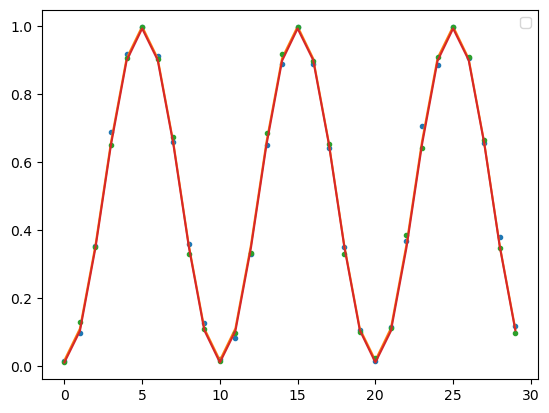

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3875, in atexit_operations
    self._atexit_once()
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3854, in _atexit_once
    self.reset(new_session=False)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1373, in reset
    self.history_manager.reset(new_session)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/history.py", line 597, in reset
    self.dir_hist[:] = [Path.cwd()]
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/pathlib.py", line 1096, in cwd
    return cls(os.getcwd())
FileNotFoundError: [Errno 2] No such file or directory


In [71]:
plt.plot(results_300us_4gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_300us_4gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
# plt.plot(results_150us_32gates_traced[:,0],".")
plt.plot(results_150us_64gates_traced[:,0],".")
# plt.plot(results_300us_100gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_300us_64gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
plt.legend ("")

In [65]:
print (data_traced.population)

[0.35124999999999995, 0.6487499999999999]


64 XXgates= 300us*64=19.2ms. Look at Raman Ramsey contrast
